In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy import misc

In [2]:
img = misc.ascent()
img.shape

(512, 512)

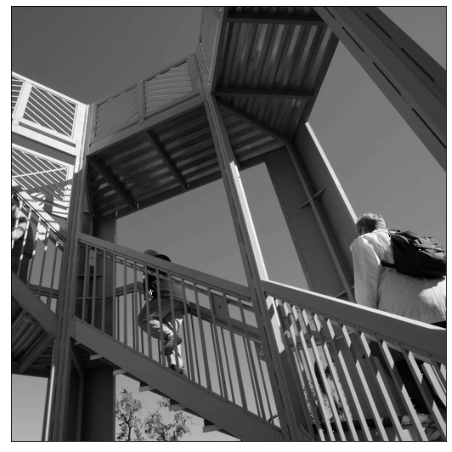

In [3]:
plt.figure(figsize=(8, 8))
fig = plt.imshow(img, cmap='gray', vmin=0, vmax=255)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

In [4]:
#Sobel filter for vertical edges - krawędzie pionowe
f1 = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]])

#Sobel filter for horizontal edges - krawędzie poziome
f2 = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]])

#Blur filter - rozmycie
f3 = np.array([[1, 1, 1, 1, 1],
               [1, 0, 0, 0, 1],
               [1, 0, 0, 0, 1],
               [1, 0, 0, 0, 1],
               [1, 1, 1, 1, 1]])
f3 = f3 / f3.sum() #Po to, żeby piksele z outputu konwolucji nie miały wartości znacząco większych niż w obrazku z konwolucją
#Bez tego clipowanie przy wizualizacji nam by zrobiło obrazek prawie cały biały (duże wartości by zostały zclipowane do wartości 255, co odpowiada kolorowi białemu)

filters = [f1, f2, f3]

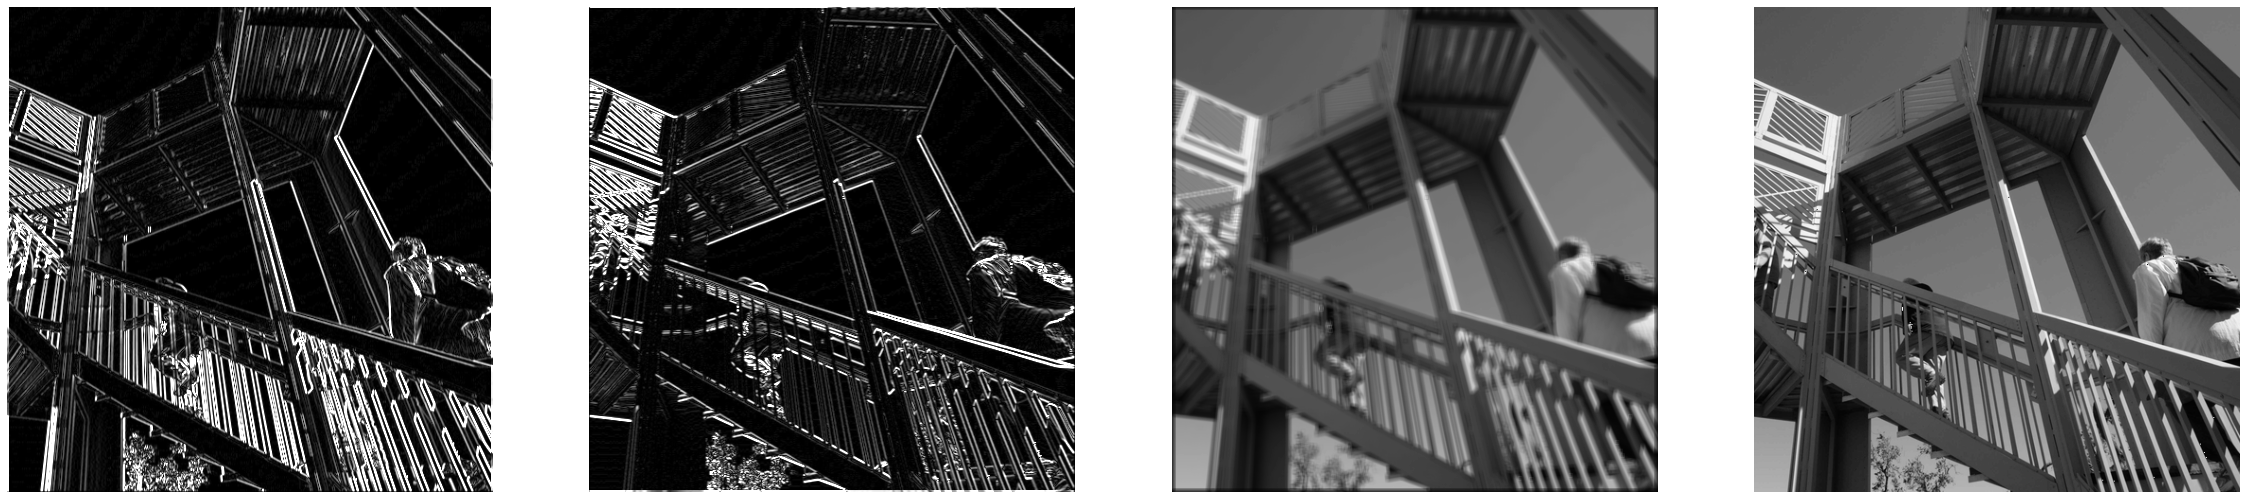

In [5]:
fig, axarr = plt.subplots(1, len(filters) + 1) 
fig.set_figheight(10)
fig.set_figwidth(40)

for i, f in enumerate(filters):
    processed_img = signal.convolve(img, f)
    processed_img = np.abs(processed_img) #Tylko w celach wizualizacji - normalnie output z konwolucji byśmy zostawili
    #bez zmian żeby zachować dodatkową informację o znaku (np czy krawędź jest z jasnego w ciemne czy z ciemnego w jasne )
    
    axarr[i].set_axis_off()
    axarr[i].imshow(processed_img, cmap='gray', vmin=0, vmax=255) #Tutaj wartości są dodatkowo "clipowane"
    
axarr[-1].set_axis_off()
axarr[-1].imshow(img, cmap='gray', vmin=0, vmax=255) #ostatni obrazek to oryginał